## $\color{red}{\text{Lecture Overview}}$
1. **Data visualization**
2. **Univariate charts for categorical data**
3. **Univariate charts for numeric data**

## $\color{red}{\text{Data Visualization}}$
1. **Data visualization** is the use of charts to form a basic understanding of data
2. It is an effective part of any data analysis
3. Often, the data type will dictate which chart to use
    - Example: Numeric, Categorical, etc.

## $\color{red}{\text{Categories of Data Visualization}}$
### $\color{blue}{\text{Univariate and Multivariate Charts}}$

1. **Univariate charts**
    - Displays the behavior of a single variable
2. **Multivariate charts**
    - Displays the relationship between two or more variables

## $\color{red}{\text{Import Required Packages}}$

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
import numpy as np
# import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## $\color{red}{\text{Import Data}}$

In [8]:
data_path = 'hrData.xlsx'
hr_df = pd.read_excel(data_path, sheet_name='origData')

In [ ]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## $\color{red}{\text{Multivariate Charts For Categorical Data}}$
### $\color{blue}{\text{Displaying Counts With CrossTabs}}$

1. For categorical data, there are limited options for visualization
2. Counts and percentages to display values in categories

### $\color{green}{\text{Example 1}}$

1. Provide a cross tabulation of the following:
    - **Attrition** by **Gender**
    - **Attrition** by **EducationField**
    - **Attrition** by **MaritalStatus**
2. Comment on it

In [ ]:
# get attrition by gender
pd.crosstab(index=hr_df['Attrition'], columns=hr_df['Gender'])

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [ ]:
pd.crosstab(index=hr_df['Attrition'], columns=hr_df['Gender'], normalize='index')

Gender,Female,Male
Attrition,,
No,0.406326,0.593674
Yes,0.367089,0.632911


In [ ]:
pd.crosstab(index=hr_df['Attrition'], columns=hr_df['Gender'], normalize='columns')

Gender,Female,Male
Attrition,,
No,0.852041,0.829932
Yes,0.147959,0.170068


In [ ]:
# Get attrition by gender
# normalize can = 'index' or 'columns'

# index is row percentage and columns is column percentage

table1 = pd.crosstab(index=hr_df['Attrition'], columns=hr_df['Gender'], normalize ='columns')




## $\color{red}{\text{Multivariate Charts For Numeric Data}}$
### $\color{blue}{\text{Displaying Relationships With Scatterplots}}$

1. Scatterplots shows the relationship between two numeric variables
2. It serves as the basis for correlation analysis

### $\color{green}{\text{Example 2}}$
1. Provide a scatterplot of the following: **Age** and **DistanceFromHome**
2. Comment on it

In [ ]:
sns.scatterplot(data=hr_df, x='Age', y='DistanceFromHome', hue='Attrition')

### $\color{blue}{\text{Displaying Relationships with a Scatterplot Matrix}}$
1. Displays a matrix of scatterplots
2. Allows to analyse multiple relationships

### $\color{green}{\text{Example 3}}$
1. Provide a scatterplot matrix of the following: **Age**, **TotalWorkingYears**, and **TrainingTimesLastYear**
2. Comment on it

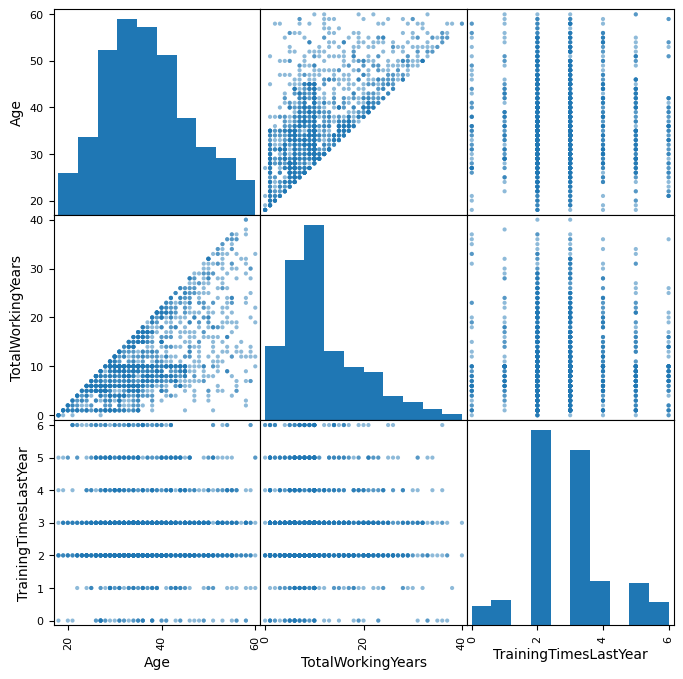

In [ ]:
variables = ['Age', 'TotalWorkingYears', 'TrainingTimesLastYear']

scat_data = hr_df[variables]

pd.plotting.scatter_matrix(scat_data, figsize=(8,8), diagonal='hist')
plt.show()

### $\color{blue}{\text{Displaying Correlations With a HeatMap}}$
1. Correlation heatmap shows the correlation between numeric variables
2. Darker colors signify high correlation and vice versa

### $\color{green}{\text{Example 4}}$
1. Provide a correlation heatmap for variables in the data
2. Comment on it
    - Which variables are highly correlated?
    - Which variables are not highly correlated?

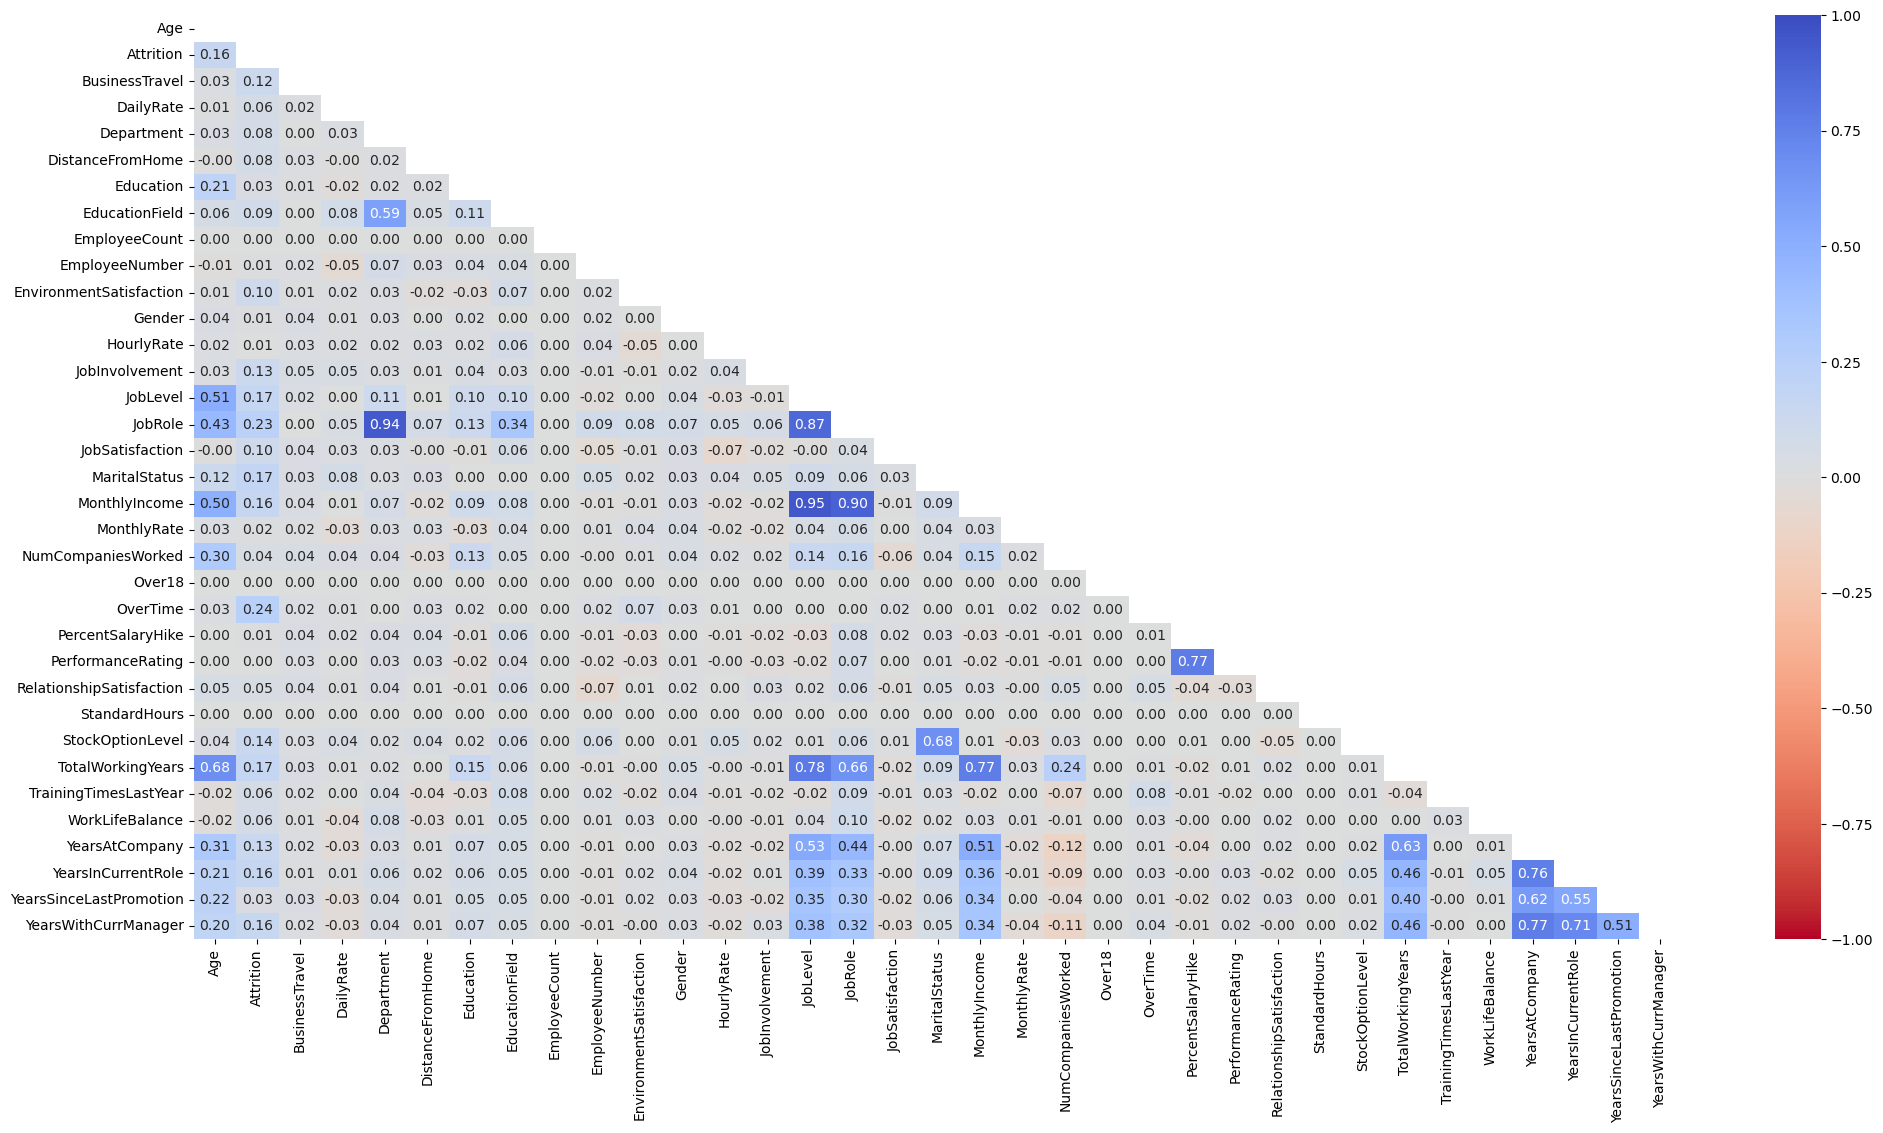

In [9]:
from dython.nominal import associations


corr_matrix = associations(hr_df, compute_only=True)['corr']

# retrieve only the upper diagonal of matrix
mask_diag = np.triu(np.ones_like(corr_matrix, dtype=bool))


# now plotting the correlation masking the upper triangle
plt.figure(figsize=(24, 12))
sns.heatmap(corr_matrix, annot=True, mask=mask_diag, cmap='coolwarm_r', fmt='.2f', vmin=-1, vmax=1)
plt.show()

## $\color{red}{\text{Multivariate Charts Between Numeric and Categorical Data}}$
### $\color{blue}{\text{Displaying Relationships With Bar Graphs}}$

1. Shows relationship between a numeric variable per category
    - Example: Average age per gender, minimum wage per department, etc

### $\color{green}{\text{Example 5}}$
1. Provide bar graphs for the following scenarios and **comment on it**
    - Average **NumCompaniesWorked** per **Department**
    - Median **JobSatisfation** per **MaritalStatus**

                        avg_companies_worked
Department                                  
Human Resources                     2.936508
Research & Development              2.733611
Sales                               2.571749


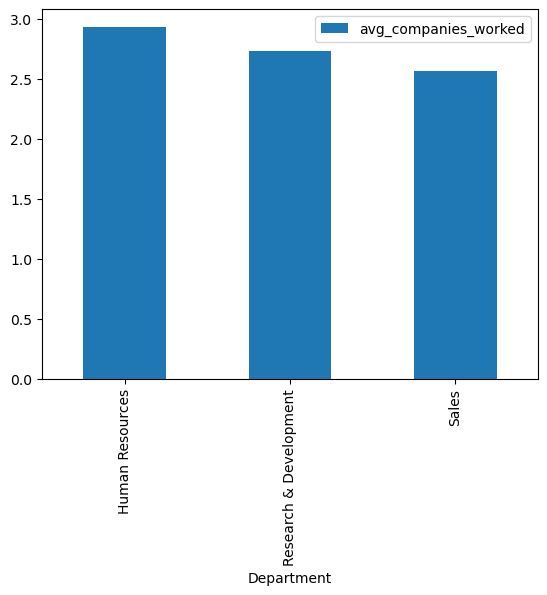

In [25]:
grp_mean = hr_df.groupby(['Department']).agg(avg_companies_worked=('NumCompaniesWorked', 'mean'))
print(grp_mean)
mean_colors = set('rgb')
grp_mean.plot(kind='bar')
plt.show()